In [1]:
import sacc
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def plot_saccs(ss, labels, colors, prefix_out=None):
    cl_names = [t for t in ss[0].tracers if 'cl' in t]
    sh_names = [t for t in ss[0].tracers if 'sh' in t]
    ncl = len(cl_names)
    nsh = len(sh_names)
    fig = plt.figure(figsize=(10, 8))
    for n in cl_names:
        t = ss[0].tracers[n]
        plt.plot(t.z, t.nz, 'r-')
    for n in sh_names:
        t = ss[0].tracers[n]
        plt.plot(t.z, t.nz, 'k--')
    plt.xlabel(r'$z$', fontsize=15)
    plt.ylabel(r'$N(z)$', fontsize=15)
    if prefix_out is not None:
        plt.savefig(f"{prefix_out}_nz.pdf", bbox_inches='tight')

    fig, axes = plt.subplots(1, ncl, figsize=(15, 3), sharex=True, sharey=True)
    for icl, cln in enumerate(cl_names):
        ax = axes[icl]
        for s, col, lab in zip(ss, colors, labels):
            ell, cl, cov = s.get_ell_cl('cl_00', cln, cln, return_cov=True)
            label = None
            if icl == 0:
                label = lab
            ax.errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), fmt=col+'.', label=lab, ms=3)
        if icl == 0:
            ax.legend()
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel(r'$\ell$', fontsize=15)
        if icl == 0:
            ax.set_ylabel(r'$C_\ell$', fontsize=15)
        ax.text(0.7, 0.85, f'{cln}-{cln}',
                transform=ax.transAxes, fontsize=12)
    if prefix_out is not None:
        plt.savefig(f"{prefix_out}_clgg.pdf", bbox_inches='tight')

    fig, axes = plt.subplots(1, ncl, figsize=(15, 3), sharex=True, sharey=True)
    for icl, cln in enumerate(cl_names):
        ax = axes[icl]
        for s, col, lab in zip(ss, colors, labels):
            ell, cl, cov = s.get_ell_cl('cl_00', cln, cln, return_cov=True)
            label = None
            if icl == 0:
                label = lab
            ax.plot(ell, np.sqrt(np.diag(cov))/cl, col+'-', label=lab)
        #if icl == 0:
        #    ax.legend()
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel(r'$\ell$', fontsize=15)
        if icl == 0:
            ax.set_ylabel(r'$\Delta C_\ell/\,C_\ell$', fontsize=15)
        ax.text(0.7, 0.85, f'{cln}-{cln}',
                transform=ax.transAxes, fontsize=12)
    if prefix_out is not None:
        plt.savefig(f"{prefix_out}_dclgg.pdf", bbox_inches='tight')

    fig, axes = plt.subplots(ncl, nsh, figsize=(15, 10), sharex=True, sharey=False)
    for icl, cln in enumerate(cl_names):
        for ish, shn in enumerate(sh_names):
            ax = axes[icl][ish]
            for s, col, lab in zip(ss, colors, labels):
                ell, cl, cov = s.get_ell_cl('cl_0e', cln, shn, return_cov=True)
                ax.errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), fmt=col+'.', label=lab, ms=3)
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.text(0.7, 0.85, f'{cln}-{shn}',
                    transform=ax.transAxes, fontsize=12)
            if icl == ncl-1:
                ax.set_xlabel(r'$\ell$', fontsize=15)
            if ish == 0:
                ax.set_ylabel(r'$C_\ell$', fontsize=15)
            if icl == 0 and ish == 0:
                ax.legend()
    if prefix_out is not None:
        plt.savefig(f"{prefix_out}_clgs.pdf", bbox_inches='tight')


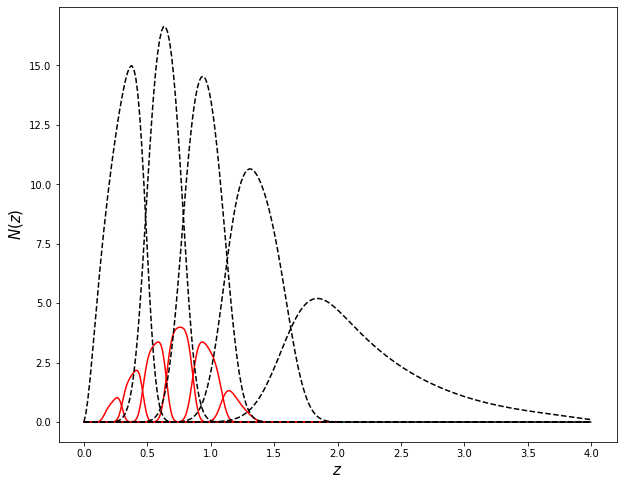

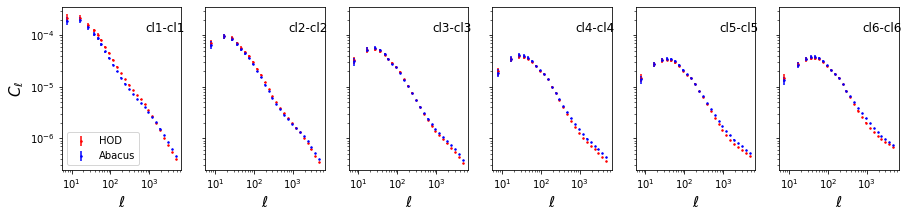

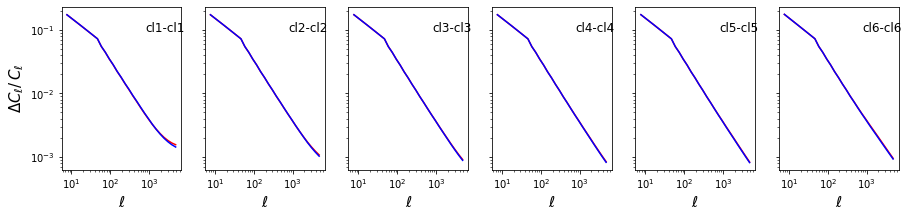

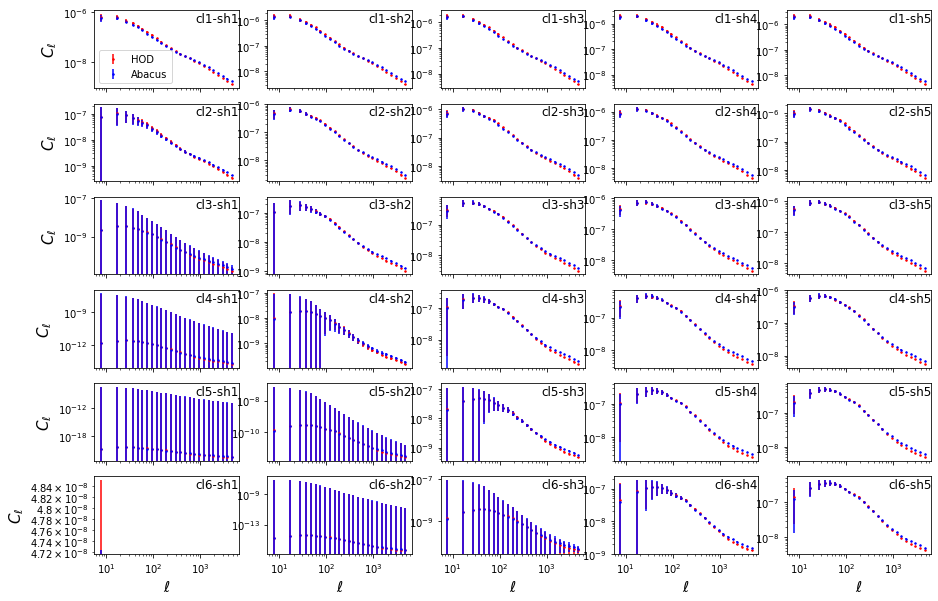

In [20]:
h3 = sacc.Sacc.load_fits("fid_red_HOD.fits")
h4 = sacc.Sacc.load_fits("abacus_red_abacus.fits")
plot_saccs([h3, h4, h5], ['HOD', 'Abacus'], ['r', 'b'], prefix_out='HOD_compare')


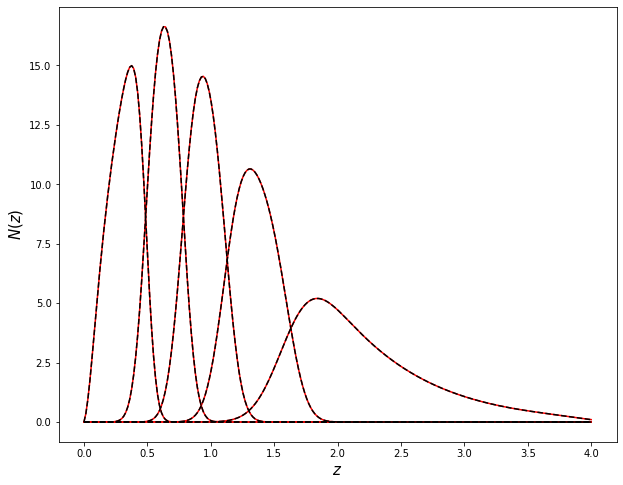

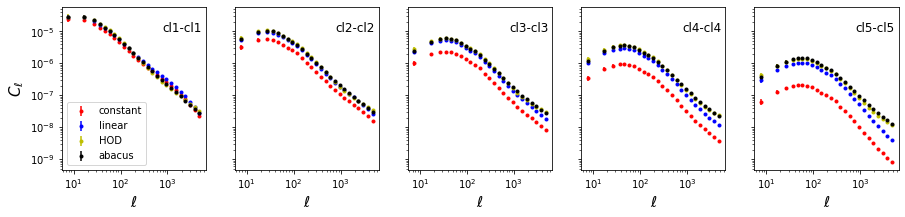

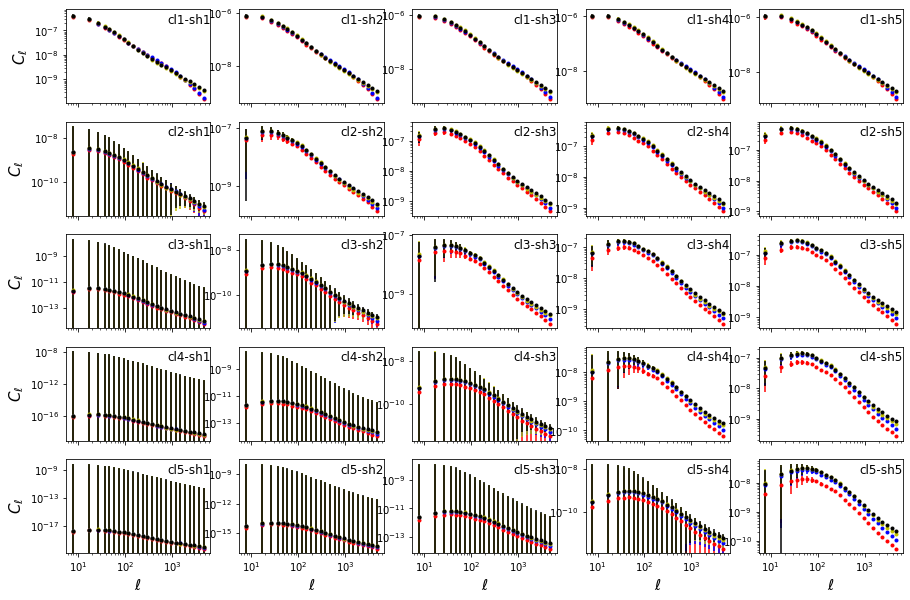

In [3]:
h1 = sacc.Sacc.load_fits("fid_shear_const.fits")
h2 = sacc.Sacc.load_fits("fid_HSC_linear.fits")
h3 = sacc.Sacc.load_fits("fid_HSC_HOD.fits")
h4 = sacc.Sacc.load_fits("abacus_HSC_abacus.fits")
plot_saccs([h1, h2, h3, h4], ['constant', 'linear', 'HOD', 'abacus'], ['r', 'b', 'y', 'k'])


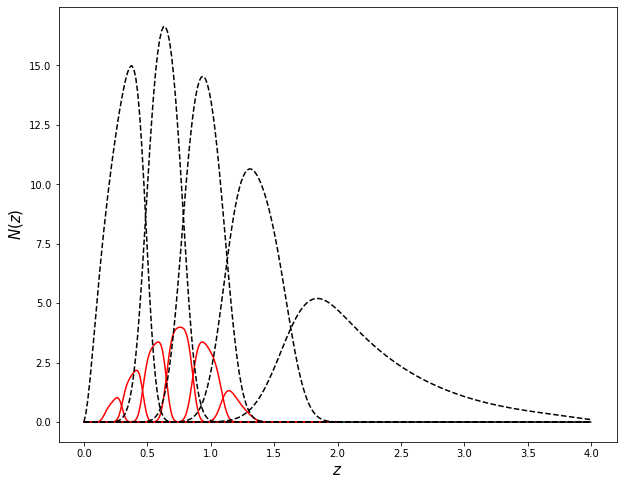

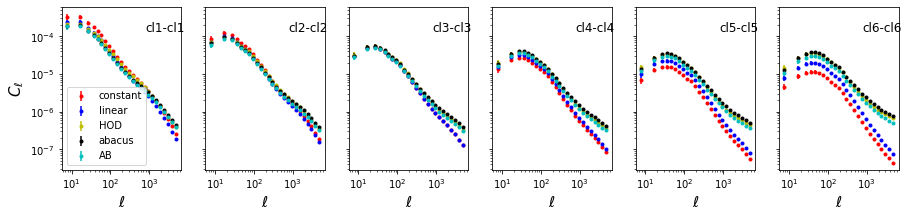

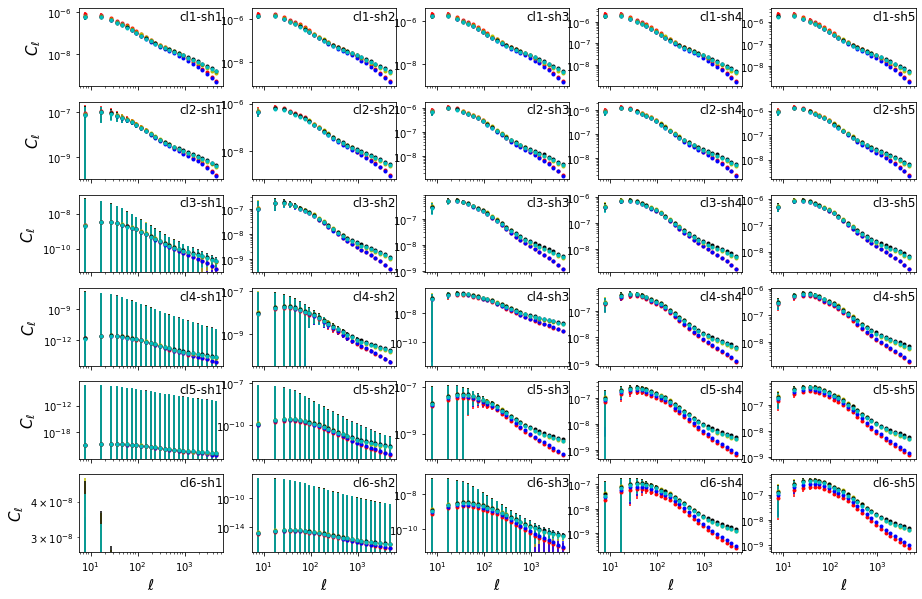

In [4]:
h1 = sacc.Sacc.load_fits("fid_red_const.fits")
h2 = sacc.Sacc.load_fits("fid_red_linear.fits")
h3 = sacc.Sacc.load_fits("fid_red_HOD.fits")
h4 = sacc.Sacc.load_fits("abacus_red_abacus.fits")
h5 = sacc.Sacc.load_fits("abacus_red_AB_abacus.fits")
plot_saccs([h1, h2, h3, h4, h5], ['constant', 'linear', 'HOD', 'abacus', 'AB'], ['r', 'b', 'y', 'k', 'c'])


No handles with labels found to put in legend.


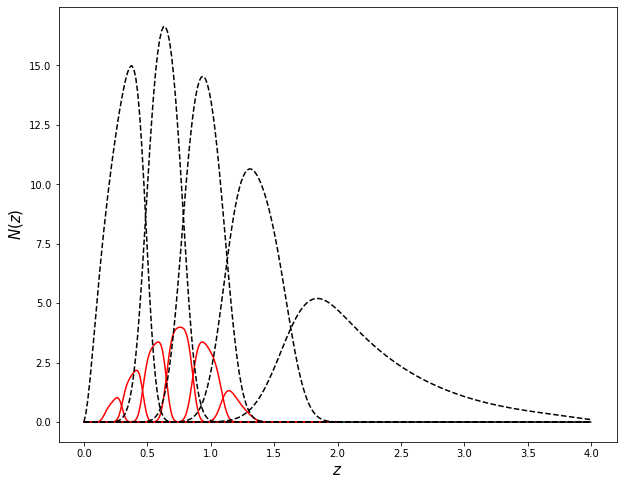

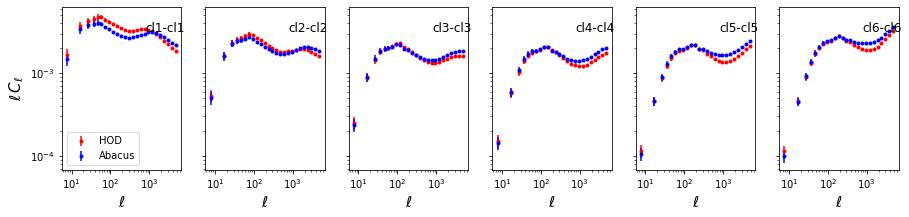

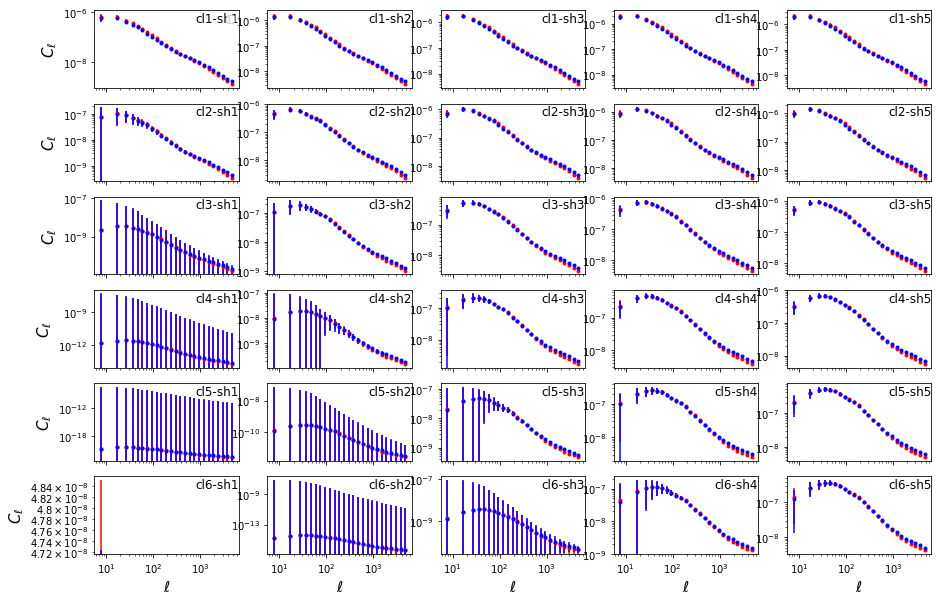

In [9]:
h3 = sacc.Sacc.load_fits("fid_red_HOD.fits")
h4 = sacc.Sacc.load_fits("abacus_red_abacus.fits")
plot_saccs([h3, h4, h5], ['HOD', 'Abacus'], ['r', 'b'], prefix_out='HOD_compare')
